# 1-. PLANTEAMINETO DEL PROBLEMA

Soy Nicolas Ernesto Aguirre Tobar, Data Scientist - Ingeniero Civil en Computación mención en Informática.

La problemática a abordar es estudiar el fenómeno de preferencia y recambio de automóviles a partir de los datos históricos de Derco Chile, haciendo un fuerte análisis a la relación entre las variables orientadas al cliente, gustos, preferencias y tendencias. Este trabajo se llevó a cabo por medio de la herramienta Python, complementando datos con información que provee el mercado automotriz.

# 2-. METODOLOGÍA DE TRABAJO  

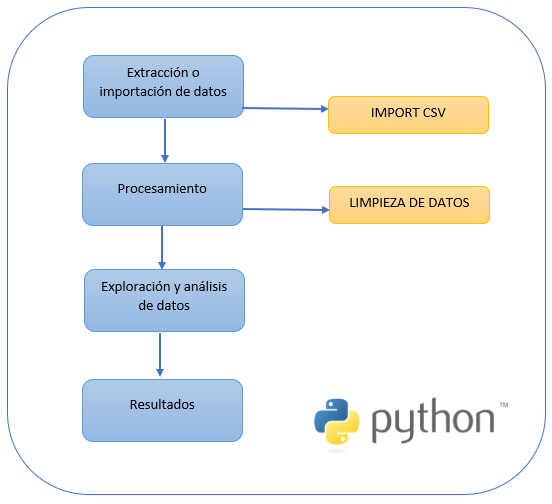

# 3-. PROCESAMIENTOS Y RESULTADOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pareto
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
%matplotlib inline

In [2]:
data =  pd.read_csv('bbdd prueba corp.Csv',sep=';',encoding="cp1252",names=['PATENTE','MARCA','MODELO','AÑO','ID_CLIENTE','COMUNA','REGION','SEXO','ACTIVIDAD','TASACION','FEC_TRANSFERENCIA','COLOR2','EDAD','VIGENCIA'])

In [3]:
data.head()

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA
0,393A4B4C-085,TOYOTA,RAV 4,2015,50838335,TEMUCO,09,M,NaN,"11947500,0",NaN,BLANCO,NaN,N
1,B1F3DB7E-F67,MAZDA,CX 5,2016,46322649,VILLA ALEMANA,05,M,NaN,NaN,NaN,NEGRO,38.0,S
2,F6DBB2E6-A76,GREAT WALL,HAVAL NEW H3 2.0,2014,36226810,ANTOFAGASTA,DE ANTOFAGASTA,NaN,NaN,NaN,NaN,NEGRO,49.0,S
3,EBCF63CD-99D,JEEP,COMPASS SPORT 2.4,2013,43482783,NaN,NaN,NaN,NaN,NaN,20160418.0,GRIS,40.0,S
4,FF38B368-B0F,SUBARU,FORESTER 2.0,2017,25657273,NaN,NaN,NaN,NaN,NaN,NaN,GRIS,62.0,S


## Preprocesamiento y limpieza

In [4]:
data['COMUNA'] = np.where(data.COMUNA==' ',None,data.COMUNA)

In [5]:
data['TASACION'] = data['TASACION'].str.strip()
data['TASACION'] = data['TASACION'].astype('str')
data['TASACION'] = data['TASACION'].apply(lambda x: x.split(',')[0])
data['TASACION'] = data['TASACION'].astype('float')

In [6]:
data['AUTOMOVIL'] = data['MARCA'].map(str)+' '+data['MODELO'].map(str)+' '+data['AÑO'].map(str)

**I.- Missing Values**  

A continuación, podemos apreciar que hay muchos missing values, siendo los atributos SEXO y ACTIVIDAD los que tienen sobre un 80% de los datos perdidos, por lo que es posible no obtener información ponderante, debido a que los datos que entregan no son representativos, sin embargo, no lo vamos a descartar, puede ser utilizado para un futuro análisis. A continuación, se muestran el porcentaje de datos faltantes por atributo.

In [7]:
data_miss = round((data.isnull().sum() / data.shape[0]) * 100 ,2)

data_miss = pd.DataFrame({'Columnas':data_miss.index,'Valores':data_miss.values})

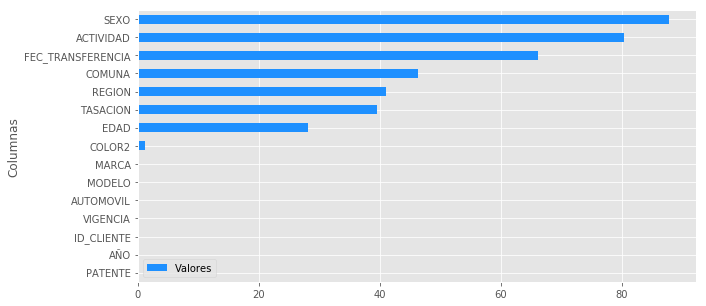

In [8]:
#fig, ax1= plt.subplots(figsize=(10,5))
data_miss.sort_values('Valores',ascending=True).plot(kind='barh',x='Columnas',y='Valores',color='dodgerblue',figsize=(10,5))
#plt.barh(data_miss['Columnas'],data_miss['Valores'],color='dodgerblue')

Haciendo un doble clic a los missing values, encontramos ciertos datos que carecen de atributos demográficos, y datos que otorgan peso orientadas al vehículo como tasación y fecha de transferencia. Sin embargo, el id del cliente está identificado y las variables para identificar las variables del vehículo también, por lo que los datos no se descartaran.

In [9]:
data[data.COMUNA.isnull() & data.REGION.isnull() & data.TASACION.isnull() & data.FEC_TRANSFERENCIA.isnull() & data.EDAD.isnull()].shape[0]

63765

In [10]:
data[data.COMUNA.isnull() & data.REGION.isnull() & data.TASACION.isnull() & data.FEC_TRANSFERENCIA.isnull() & data.EDAD.isnull()].head()

,PATENTE,MARCA,MODELO,AÑO,ID_CLIENTE,COMUNA,REGION,SEXO,ACTIVIDAD,TASACION,FEC_TRANSFERENCIA,COLOR2,EDAD,VIGENCIA,AUTOMOVIL
47,C8A36337-C0C,MERCEDES BENZ,GLA 250 2.0 AUT,2014,256279670,NaN,NaN,NaN,NaN,NaN,NaN,BLANCO,NaN,S,MERCEDES BENZ GLA 250 2.0 AUT 2014
52,FC8144AB-B35,HYUNDAI,STAREX,2018,42719859,NaN,NaN,NaN,NaN,NaN,NaN,PLATEADO,NaN,S,HYUNDAI STAREX 2018
62,B9F43FEF-353,VOLVO,XC60 D5 MOMENTUM,2018,75108769,NaN,NaN,NaN,NaN,NaN,NaN,BLANCO,NaN,S,VOLVO XC60 D5 MOMENTUM 2018
71,A97C35B4-E69,KIA MOTORS,SORENTO EX 4X4 2.2 AT,2017,79657319,NaN,NaN,NaN,NaN,NaN,NaN,NEGRO,NaN,S,KIA MOTORS SORENTO EX 4X4 2.2 AT 2017
98,BD8D3B2D-CEA,TOYOTA,4RUNNER4.0,2017,252090298,NaN,NaN,NaN,NaN,NaN,NaN,BLANCO,NaN,S,TOYOTA 4RUNNER4.0 2017


## Análisis de datos

**II.- Análisis por COMUNA**

**A.- Cantidad de tenencia de vehículos por comuna**

Podemos ver que el 80% de los datos, se distribuyen en 13 comunas, siendo Las Condes la más representativa, esto nos puede dar luces que esta data proviene de una casa central alojada en las condes, debido a que el flujo de datos por comuna debería apuntar a Santiago, siendo esta un 27% más grande en cantidad de habitantes que Las Condes.

In [11]:
top20_comuna = data.groupby(['COMUNA'],as_index=False).agg({'ID_CLIENTE':'count','EDAD':'mean'}).sort_values('ID_CLIENTE',ascending=False).head(20)

In [12]:
top20_comuna['pareto'] = top20_comuna.ID_CLIENTE /  top20_comuna.ID_CLIENTE.sum()
top20_comuna['pareto'] = top20_comuna['pareto'].apply(lambda x: round(x*100,1))
top20_comuna['pareto'] = top20_comuna['pareto'].cumsum()

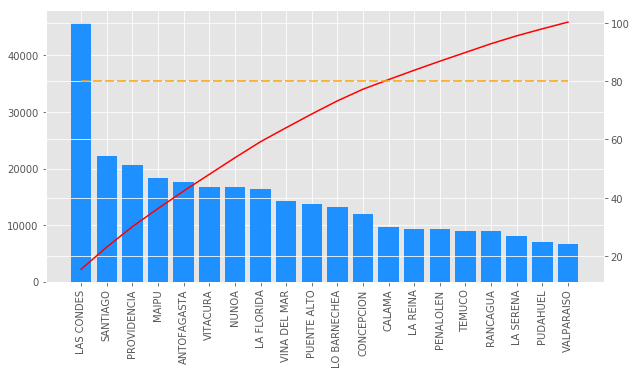

In [13]:
fig, ax1= plt.subplots(figsize=(10,5))

ax1.bar(top20_comuna['COMUNA'],top20_comuna['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(top20_comuna['COMUNA'],top20_comuna['pareto'],color='red')

ax2.plot(top20_comuna['COMUNA'],np.zeros(top20_comuna.shape[0])+80,dashes=[6,2],color='orange')

plt.show()

**B.- Cantidad de tenencia de vehículos por comuna, explorando la distribución de marcas**

Hacemos un sondeo con respecto a la distribución de marcas por comuna, tomando en cuenta la cantidad de tenencia por comuna. Tomamos el top 20 por comunas, debido a que el análisis anterior, nos la información que el 80% de los datos se centraba en 13 comunas, por lo que podemos inferir este número como la cantidad representativa para estudiar un patrón de marcas por comuna.
Podemos observar que las marcas con más tenencia en la comuna de Las Condes son las TOYOTA, HYUNDAI, SUBARU, NISSAN Y JEEP. En contraste con la comuna de Maipú, que tiene como marcas con más tenencia HYUNDAI, CHEVROLET y KIA MOTORS.


In [14]:
comunas = data.groupby('COMUNA', as_index=False).agg({'ID_CLIENTE':'count'}).sort_values('ID_CLIENTE',ascending=False)[:13]
comunas = data[data.COMUNA.isin(comunas.COMUNA)]

In [15]:
total_comunas = comunas.groupby(['COMUNA','MARCA'],as_index=False).agg({'ID_CLIENTE':'count'}).sort_values(['ID_CLIENTE','COMUNA'],ascending=False)
top5_mc = total_comunas.groupby('COMUNA',as_index=False).head(10)

total_comunas['COMUNA-MARCA'] = total_comunas['COMUNA'].map(str)+'-'+total_comunas['MARCA'].map(str)
top5_mc['COMUNA-MARCA'] = top5_mc['COMUNA'].map(str)+'-'+top5_mc['MARCA'].map(str)

total_comunas['MARCA'] = np.where(total_comunas['COMUNA-MARCA'].isin(top5_mc['COMUNA-MARCA']),total_comunas.MARCA,'OTRO')

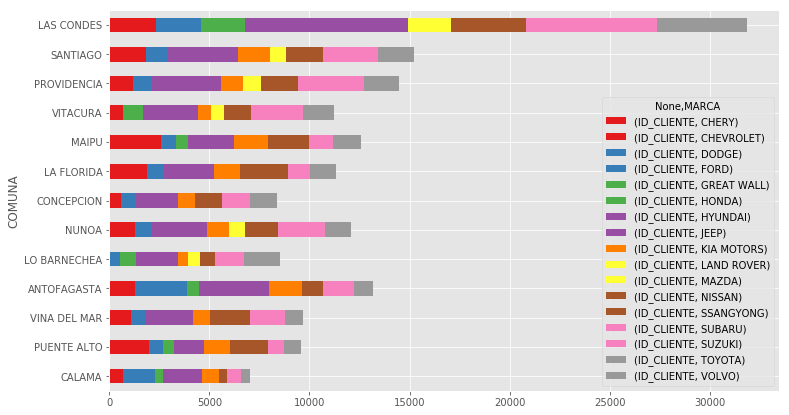

In [16]:
fig ,ax= plt.subplots(figsize=(12,7))
ax = top5_mc.groupby(['COMUNA','MARCA']).agg({'ID_CLIENTE':sum}).unstack(level=1).sort_values(('ID_CLIENTE','TOYOTA')).plot(kind='barh',cmap='Set1',stacked=True,ax=ax)

**III.- Análisis por MARCA**

**A.- Cantidad de tenencia por MARCA y VIGENCIA**  

La tenencia de Marcas por vigencia nos muestra que de las marcas HYUNDAI, KIA MOTORS Y CHEVROLET tienen los índices más altos con tenencia por vehículo no vigente

In [17]:
marcas = data.groupby('MARCA',as_index=False).agg({'ID_CLIENTE':'count'}).sort_values('ID_CLIENTE',ascending=False)[:20]
marcas = data[data.MARCA.isin(marcas.MARCA)]

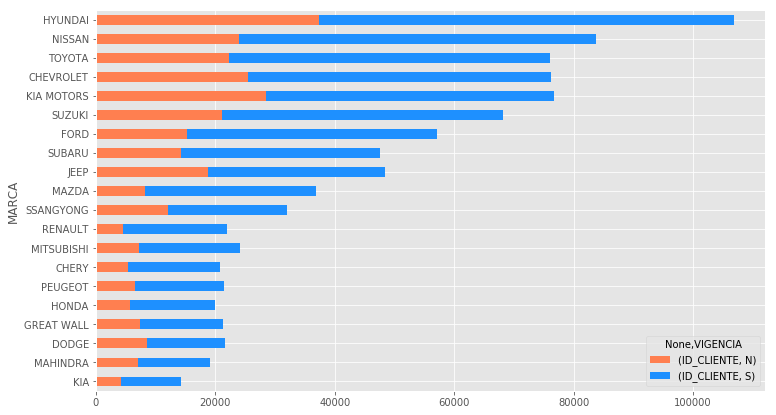

In [18]:
fig ,ax= plt.subplots(figsize=(12,7))
ax = marcas.groupby(['MARCA','VIGENCIA']).agg({'ID_CLIENTE':'count'}).unstack(level=1).sort_values(('ID_CLIENTE','S')).plot(kind='barh',legend='Vigencia',color=['coral','dodgerblue'],stacked=True,ax=ax)


**B.- Cantidad de tenencia por MARCA**  

Podemos inferir que con un 80% de representatividad en tenencia de vehículos hay 11 marcas que lideran en los datos históricos, siendo estas las siguientes: 

1.- HYUNDAI  
2.- NISSAN  
3.- KIA MOTORS  
4.- CHEVROLET  
5.- TOYOTA  
6.- SUZUKI  
7.- FORD  
8.- JEEP  
9.- SUBARU  
10.- MAZDA  
11.- SSANGYONG 

In [19]:
top20_marcas = data.groupby(['MARCA'],as_index=False).agg({'ID_CLIENTE':'count','EDAD':'mean'}).sort_values('ID_CLIENTE',ascending=False).head(20)

top20_marcas['pareto'] = top20_marcas.ID_CLIENTE /  top20_marcas.ID_CLIENTE.sum()
top20_marcas['pareto'] = top20_marcas['pareto'].apply(lambda x: round(x*100,1))
top20_marcas['pareto'] = top20_marcas['pareto'].cumsum()

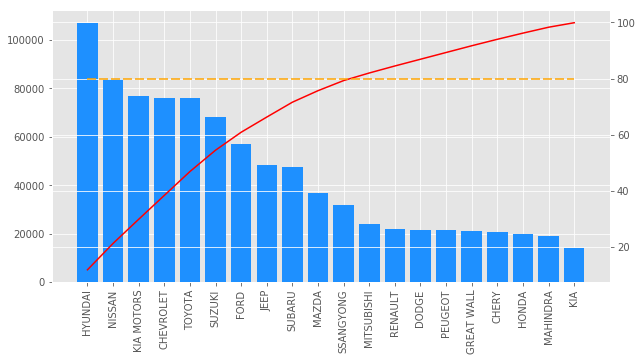

In [20]:
fig, ax1= plt.subplots(figsize=(10,5))

ax1.bar(top20_marcas['MARCA'],top20_marcas['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(top20_marcas['MARCA'],top20_marcas['pareto'],color='red')

ax2.plot(top20_marcas['MARCA'],np.zeros(top20_marcas.shape[0])+80,dashes=[6,2],color='orange')

plt.show()

**C.- Cantidad de tenencia por MARCA y EDAD**  

Podemos observar que de las marcas con mayor edad asociada es HONDA Y SUBARU con una media de edad de 52 años. Por otro lado, la menor edad asociadas a las marcas MAZDA, SUZUKI, RENAULT y DODGE con una edad media de 47 años. Por ultimo podemos observar que de la marca con más tenencia HYUNDAI tiene una edad media de 49 a 50 años aproximadamente.

In [21]:
top14_marcas = top20_marcas.head(14)

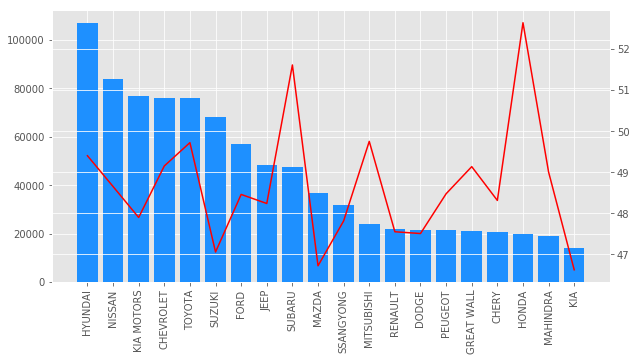

In [22]:
fig, ax1= plt.subplots(figsize=(10,5))

ax1.bar(top20_marcas['MARCA'],top20_marcas['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(top20_marcas['MARCA'],top20_marcas['EDAD'],color='red')

plt.show()

**D.- Distribución de edades por MARCA**  

El 50% de los datos por cada marca, se concentra entre 40 y 60 años, teniendo una mediana cerca de los 50 años, esto corrobora que la distribución de los datos es confiable para utilizar la edad media por marca, debido a que existe una desviación mínima, concentrándose los datos cera de las edades anteriormente contempladas.  

In [23]:
desv_em = data[data.MARCA.isin(top14_marcas['MARCA'])]

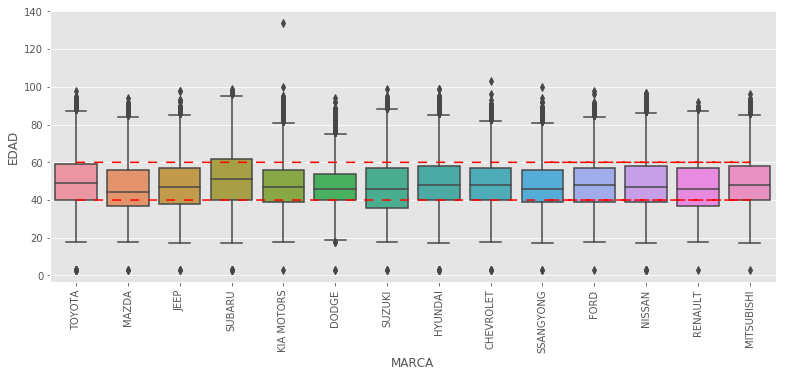

In [24]:
fig= plt.subplots(figsize=(13,5))

g = sns.boxplot(x='MARCA',y='EDAD',data=desv_em)

g.set_xticklabels(g.get_xticklabels(),rotation='vertical')

g.plot(desv_em['MARCA'],np.zeros(desv_em.shape[0])+60,dashes=[6,6],color='red')
g.plot(desv_em['MARCA'],np.zeros(desv_em.shape[0])+40,dashes=[6,6],color='red')

plt.show()

**IV.- Análisis por COLOR**

**A.- Cantidad de tenencia por COLOR**

Vemos un patrón claro, de la tenencia de vehículos, un 90% de los datos es asociado a 5 colores GRIS, BLANCO, PLATEADO, NEGRO Y ROJO. Los tres primeros colores, son colores claros, se plantea la hipótesis que la gente tiende a estos colores porque estos reflejan el calor, otra razón es simplemente porque la gente le gusta estos colores, de todas maneras, la tendencia es clara, un 80% de los datos se agrupa en 3 colores GRIS, BLANCO Y PLATEADO. 

In [25]:
colores = data.groupby('COLOR2',as_index=False).agg({'ID_CLIENTE':'count','EDAD':'mean'}).sort_values('ID_CLIENTE',ascending=False).head(20)

colores['pareto'] = colores.ID_CLIENTE / colores.ID_CLIENTE.sum()
colores['pareto'] = colores['pareto'].apply(lambda x: round(x*100,1))
colores['pareto'] = colores['pareto'].cumsum()

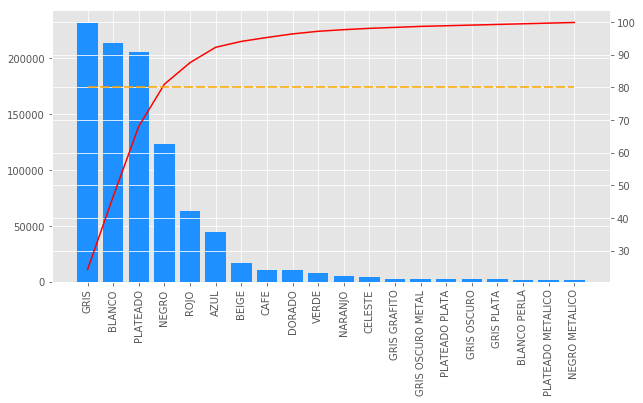

In [26]:
fig, ax1= plt.subplots(figsize=(10,5))

ax1.bar(colores['COLOR2'],colores['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(colores['COLOR2'],colores['pareto'],color='red')

ax2.plot(colores['COLOR2'],np.zeros(colores.shape[0])+80,dashes=[6,2],color='orange')

plt.show()

**V.- Análisis por MODELO**

Se trabajo en una clasificación macro por modelos, esto engloba solo el modelo, dejando de lado diferenciaciones específicas. Se hizo con respecto al top 500 de modelos con más tenencias, el resto de los modelos se clasificarán en "OTROS". En conclusión, se catalogaron de manera macro los modelos, utilizando la etiqueta **MARCA + MODELO**, simplificando el modelo sin especificaciones técnicas. 

In [27]:
seg_modelos = pd.read_csv('MODELOS.csv',sep=';')
seg_modelos['MARCA+MODELO'] = seg_modelos['MARCA'].map(str)+' '+seg_modelos['MODELOS'].map(str)

In [28]:
data = pd.merge(data,seg_modelos[['MODELO','MARCA+MODELO']],on='MODELO',how='left')

**A.- Cantidad de tenencias por MODELO**  

En el siguiente gráfico se muestra que un total de 50 modelos anteriormente subclasificados, representa el 70% del total de la data, esto es bastante aceptable, en base a esto, podemos averiguar patrones a partir de las tasaciones promedio y de las edades asociadas a estos modelos.

In [29]:
modelos = data.groupby('MARCA+MODELO',as_index=False).agg({'ID_CLIENTE':'count','EDAD':'mean'}).sort_values('ID_CLIENTE',ascending=False).head(50)

modelos['pareto'] = modelos.ID_CLIENTE / colores.ID_CLIENTE.sum()
modelos['pareto'] = modelos['pareto'].apply(lambda x: round(x*100,1))
modelos['pareto'] = modelos['pareto'].cumsum()

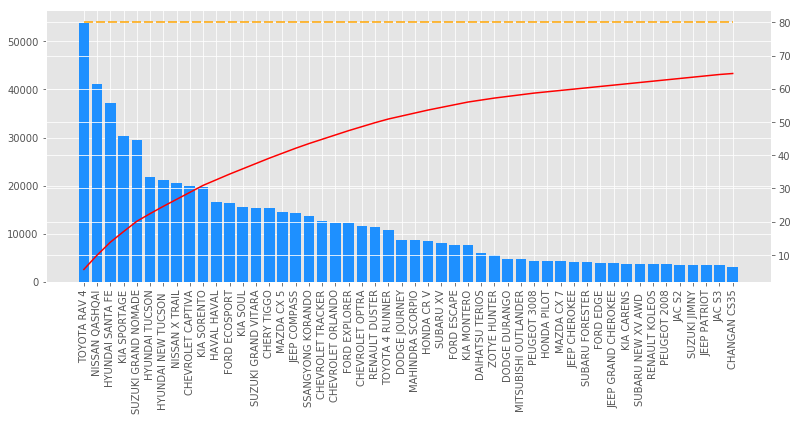

In [30]:
fig, ax1= plt.subplots(figsize=(13,5))

ax1.bar(modelos['MARCA+MODELO'],modelos['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(modelos['MARCA+MODELO'],modelos['pareto'],color='red')

ax2.plot(modelos['MARCA+MODELO'],np.zeros(modelos.shape[0])+80,dashes=[6,2],color='orange')

plt.show()

**B.- Cantidad de tenencia por MODELO y VIGENCIA**  

La tenencia de Marcas por vigencia nos muestra que de las modelos TOYOTA RAV 4 y HYUNDAI SANTA FE  tienen los índices más altos con tenencia por vehículo no vigente de las tasaciones promedio y de las edades asociadas a estos modelos.

In [31]:
top50_modelos = data.groupby('MARCA+MODELO',as_index=False).agg({'ID_CLIENTE':'count'}).sort_values('ID_CLIENTE',ascending=False).head(30)
top50_modelos = data[data['MARCA+MODELO'].isin(top50_modelos['MARCA+MODELO'])]

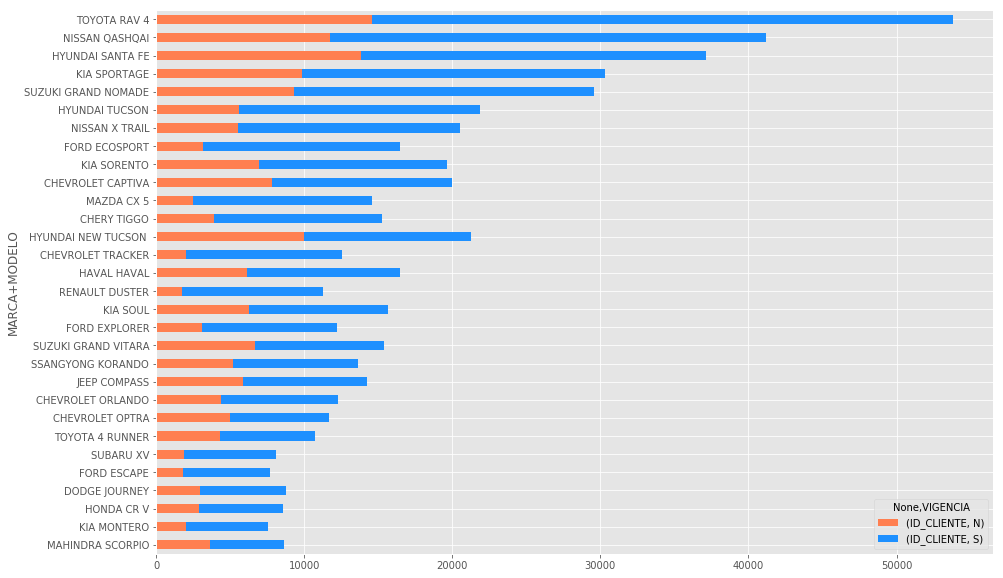

In [32]:
fig ,ax= plt.subplots(figsize=(15,10))
ax = top50_modelos.groupby(['MARCA+MODELO','VIGENCIA']).agg({'ID_CLIENTE':'count'}).unstack(level=1).sort_values(('ID_CLIENTE','S')).plot(kind='barh',legend='Vigencia',color=['coral','dodgerblue'],stacked=True,ax=ax)


**C.- Cantidad de tenencia por MODELO y EDAD**  

Podemos observar que los modelos con mayor edad asociada es CHEVROLET OPTRA Y HONDA CR V con una media de edad de 53 Y 56 años respectivamente. Por otro lado, nos llevamos la gran sorpresa al ver que la escala de edades disminuyo a una edad de 44 mínima, esta edad promedio se asocia al modelo SUZUKI GRAND VITARA. La distribución de los datos nos muestra que las edades de tenencia de vehículos van a una tendencia de 50 años como valor medio.

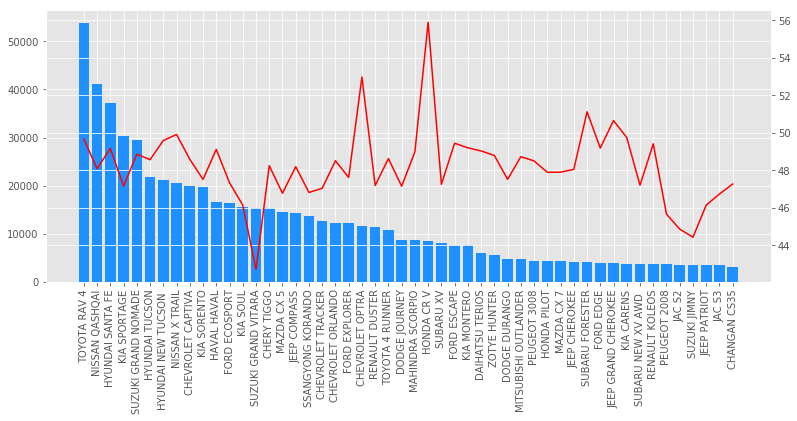

In [33]:
fig, ax1= plt.subplots(figsize=(13,5))

ax1.bar(modelos['MARCA+MODELO'],modelos['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(modelos['MARCA+MODELO'],modelos['EDAD'],color='red')

plt.show()

**D.- Distribución de las edades por MODELO**  

El 50% de los datos por cada modelo, se concentra entre 40 y 60 años, teniendo una mediana cerca de los 50 años, esto corrobora que la distribución de los datos es confiable para utilizar la edad media por modelo, debido a que existe una desviación mínima, concentrándose los datos cera de las edades anteriormente contempladas. Esta desviación se puede observar en los modelos SUBARU FORESTER, HONDA CR V como los modelos que tienden sobre los 60 años y en contraparte MAZDA CX 5, SUBARU XV, SUZUKI GRAND VITARA, PEUGEOT 2008, SUBARU NEW XV AWD y SUZUKI JIMMY tendiendo a una edad menor a 40 años.

In [34]:
desv_m = data[data['MARCA+MODELO'].isin(modelos['MARCA+MODELO'])]

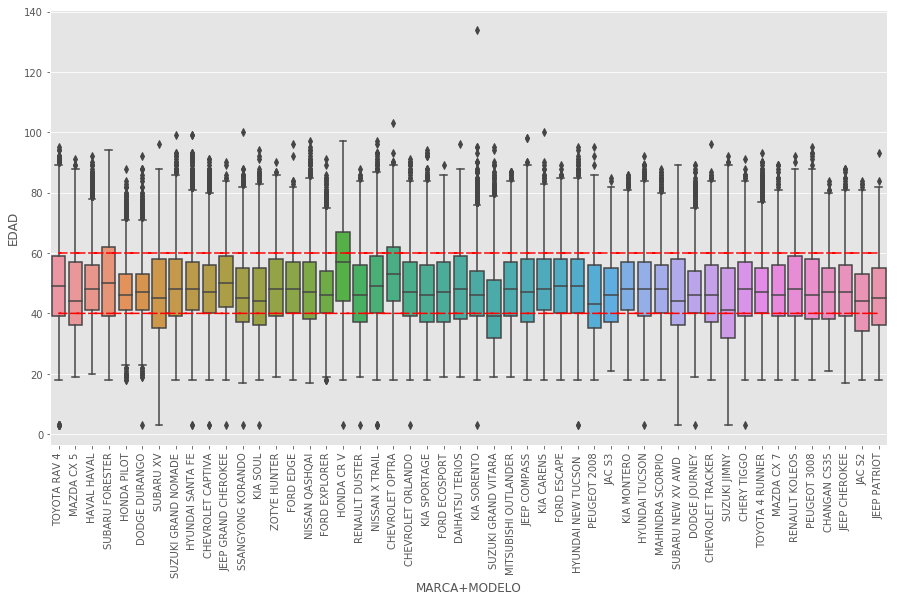

In [35]:
fig= plt.subplots(figsize=(15,8))

g = sns.boxplot(x='MARCA+MODELO',y='EDAD',data=desv_m)

g.set_xticklabels(g.get_xticklabels(),rotation='vertical')

g.plot(desv_m['MARCA+MODELO'],np.zeros(desv_m.shape[0])+60,dashes=[6,6],color='red')
g.plot(desv_m['MARCA+MODELO'],np.zeros(desv_m.shape[0])+40,dashes=[6,6],color='red')

plt.show()

**E.-Cantidad de tenencia por MODELO y TASACION**  

Por último, vemos las tasaciones promedio asignadas a los diferentes modelos. Este gráfico es interesante para visualizar los intereses de los clientes a partir de la tasación de un vehículo y su respectivo modelo y marca asociada.

In [36]:
top50M_tas = data.groupby(['MARCA+MODELO'],as_index=False).agg({'ID_CLIENTE':'count','TASACION':'mean','EDAD':'mean'}).sort_values('ID_CLIENTE',ascending=False).head(50)
top50M_tas['TASACION'] = round(top50M_tas['TASACION'] / 1000000,2)
top50M_tas['TASACION'] = top50M_tas.TASACION.fillna(0)

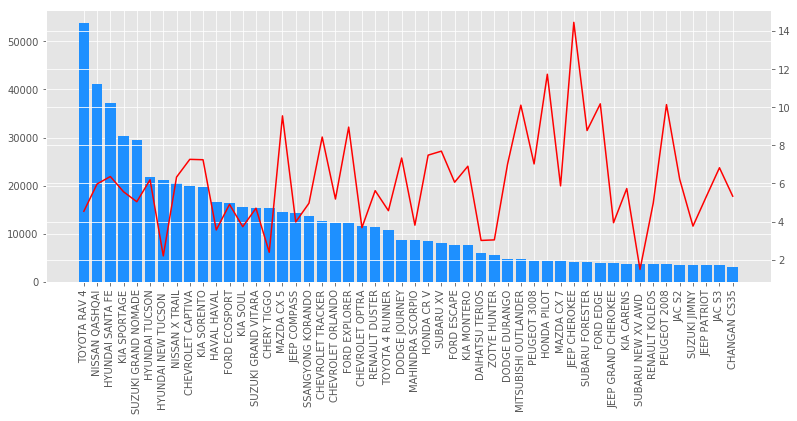

In [37]:
fig, ax1= plt.subplots(figsize=(13,5))

ax1.bar(top50M_tas['MARCA+MODELO'],top50M_tas['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(top50M_tas['MARCA+MODELO'],top50M_tas['TASACION'],color='red')


plt.show()


Se ve que algunas tasaciones son erróneas, por ejemplo, SUSUKI NEW XV AWD está bajo los $2 millones, siendo que en el mercado esta tazado sobre los $12 millones. Para mejorar esta visualización, se completaron los valores con tasaciones promedio sin tomar en cuentas las especificaciones de los vehículos y estudiando el mercado. 

In [38]:
tasaciones_modelo = pd.read_csv('tasacion-modelos.csv',sep=';')

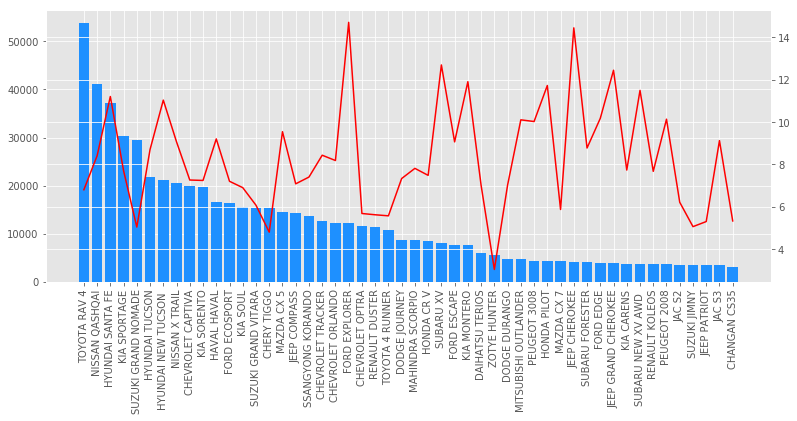

In [39]:
fig, ax1= plt.subplots(figsize=(13,5))

ax1.bar(tasaciones_modelo['MARCA+MODELO'],tasaciones_modelo['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(tasaciones_modelo['MARCA+MODELO'],tasaciones_modelo['TASACION'],color='red')


plt.show()

**VI.- Análisis por VEHÍCULO**

**A.- Cantidad de tenencia por VEHÍCULO** 

A continuación, se hace un pequeño análisis por vehículo, vehículo se define como MARCA-MODELO-VEHICULO, pero queda en evidencia que el top 50 de vehículos representan el 10% de los datos, por lo que se infiere que estos 50 vehículos no son representativos para hace un análisis de patrones. Sin embargo, se hizo un pequeño análisis de distribución de los datos por el top 50 de vehículos con mayor tenencia.

In [40]:
top20_autos = data.groupby(['MARCA','MODELO','AÑO'],as_index=False).agg({'ID_CLIENTE':'count','EDAD':'mean'}).sort_values('ID_CLIENTE',ascending=False).head(50)
top20_autos['AUTOMOVIL'] = top20_autos['MARCA'].map(str)+' '+top20_autos['MODELO'].map(str)+' '+top20_autos['AÑO'].map(str)

In [41]:
top20_autos['pareto'] = top20_autos.ID_CLIENTE / colores.ID_CLIENTE.sum()
top20_autos['pareto'] = top20_autos['pareto'].apply(lambda x: round(x*100,1))
top20_autos['pareto'] = top20_autos['pareto'].cumsum()

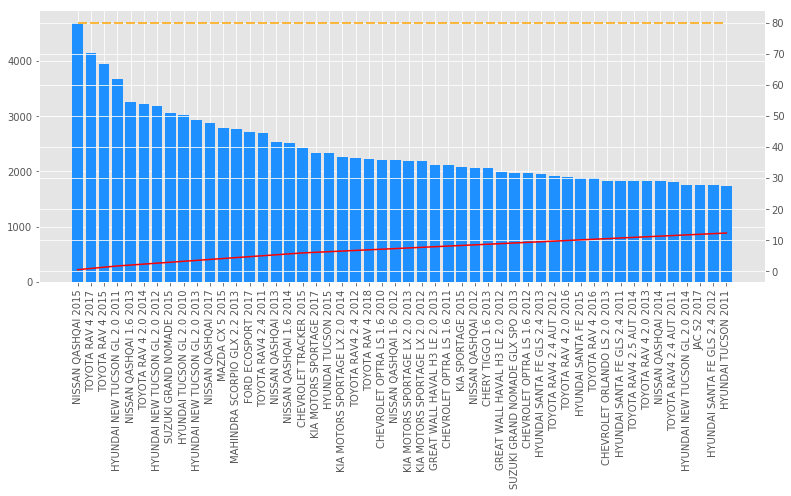

In [42]:
fig, ax1= plt.subplots(figsize=(13,5))

ax1.bar(top20_autos['AUTOMOVIL'],top20_autos['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(top20_autos['AUTOMOVIL'],top20_autos['pareto'],color='red')

ax2.plot(top20_autos['AUTOMOVIL'],np.zeros(top20_autos.shape[0])+80,dashes=[6,2],color='orange')

plt.show()

**B.- Cantidad de tenencia por VEHÍCULO y EDAD** 

Se puede observar que los vehículos con mayor edad media asociada son los vehículos CHEVROLET OPTRALS 1.6 2010 y CHEVROLET OPTRALS 1.6 2011, con una edad promedio de 54 años. Por otro lado los vehículos con menor edad promedio son KIA MOTORS SPORTAGE LX2.0 2014, FORD ECOSPORT 2017 y NISSAN QASHQAI 2013, con una edad promedio de 46 años.

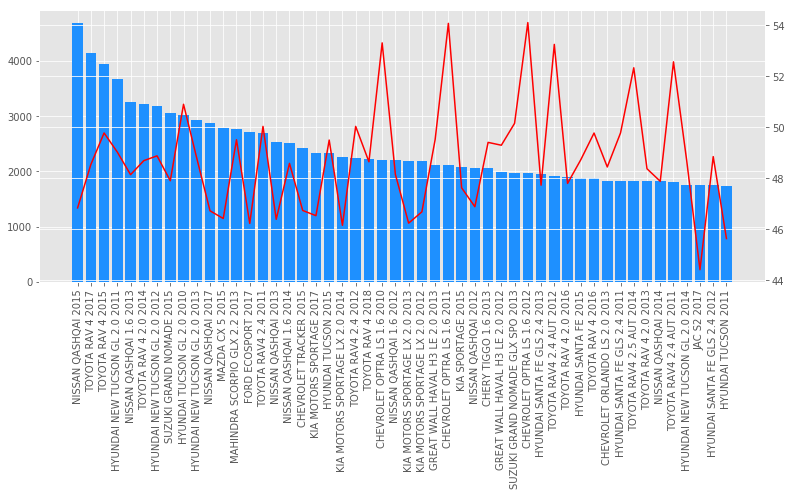

In [43]:
fig, ax1= plt.subplots(figsize=(13,5))

ax1.bar(top20_autos['AUTOMOVIL'],top20_autos['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(top20_autos['AUTOMOVIL'],top20_autos['EDAD'],color='red')


plt.show()

**C.- Distribución de edades por VEHÍCULO**  

El 50% de los datos por cada marca, se concentra entre 40 y 60 años, teniendo una mediana cerca de los 50 años, esto corrobora que la distribución de los datos es confiable para utilizar la edad media por marca, debido a que existe una desviación mínima, concentrándose los datos cera de las edades anteriormente contempladas. Por otro lado, se puede ver que los modelos que se acercan más al límite de los 60 años son los vehículos CHEVROLET OPTRALS 1.6.

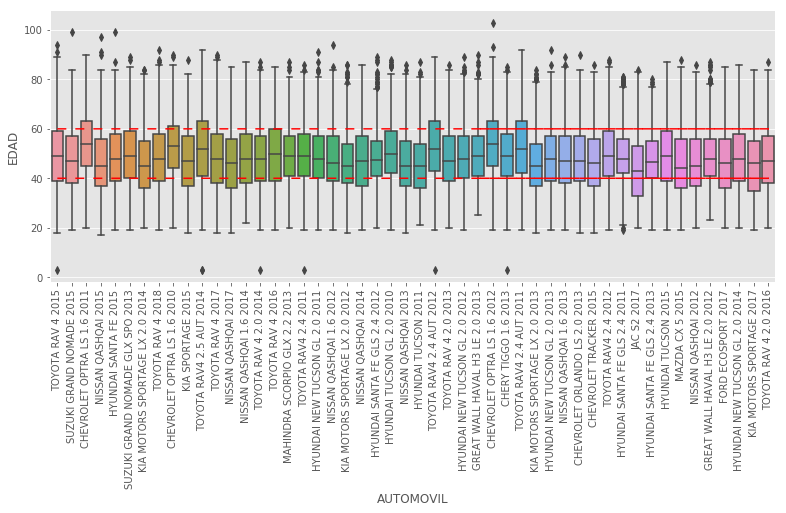

In [44]:
desv_vh = data[data.AUTOMOVIL.isin(top20_autos['AUTOMOVIL'])]

fig= plt.subplots(figsize=(13,5))

g = sns.boxplot(x='AUTOMOVIL',y='EDAD',data=desv_vh)

g.set_xticklabels(g.get_xticklabels(),rotation='vertical')

g.plot(desv_vh['AUTOMOVIL'],np.zeros(desv_vh.shape[0])+60,dashes=[6,6],color='red')
g.plot(desv_vh['AUTOMOVIL'],np.zeros(desv_vh.shape[0])+40,dashes=[6,6],color='red')

plt.show()

**D.- Cantidad de tenencia por VEHÍCULO y TASACIÓN**  

Por último, podemos ver el promedio de tasaciones por vehículo, como primer punto, se definió que estos datos por vehículos son muy específicos, por lo que no son representativos para encontrar un patrón interesante en la data, sin embargo se llevó a cabo este análisis con el fin de contrastar las marcas, modelos y años de los vehículos de forma histórica. Continuando con el análisis, el siguiente gráfico muestra que del top 50 de los vehículos con mayor tenencia, los que tienen una mayor tasación son los HYUNDAI SANTA FE 2015, TOYOTA RAV 4 2016 Y MAZDA CX 5 2017.

In [45]:
top20_autos_tas = data.groupby(['MARCA','MODELO','AÑO'],as_index=False).agg({'ID_CLIENTE':'count','TASACION':'mean','EDAD':'mean'}).sort_values('ID_CLIENTE',ascending=False).head(50)
top20_autos_tas['TASACION'] = round(top20_autos_tas['TASACION'] / 1000000,2)
top20_autos_tas['AUTOMOVIL'] = top20_autos_tas['MARCA'].map(str)+' '+top20_autos_tas['MODELO'].map(str)+' '+top20_autos_tas['AÑO'].map(str)
top20_autos_tas['TASACION'] = top20_autos_tas.TASACION.fillna(0)

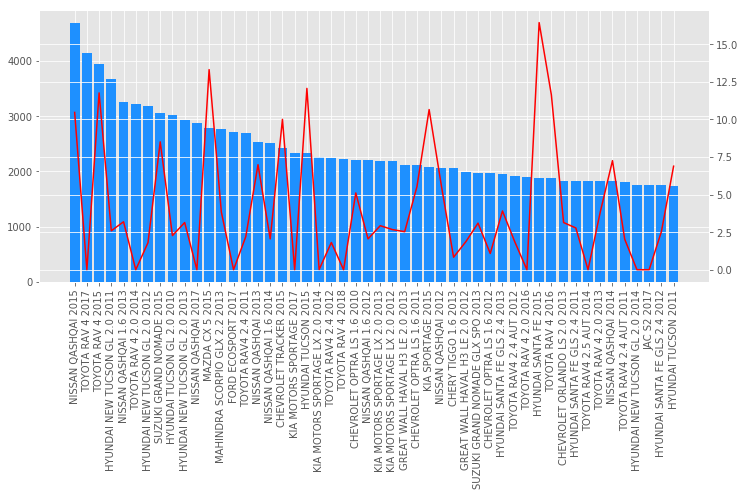

In [46]:
fig, ax1= plt.subplots(figsize=(12,5))

ax1.bar(top20_autos_tas['AUTOMOVIL'],top20_autos_tas['ID_CLIENTE'],color='dodgerblue')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation='vertical')

ax2 = ax1.twinx()

ax2.plot(top20_autos_tas['AUTOMOVIL'],top20_autos_tas['TASACION'],color='red')


plt.show()

**VII.- Análisis recambios por año**

En el siguiente gráfico se muestra el crecimiento de tenencia de vehículos por año, relacionado con la variable macroeconómica PIB. Los datos inician el 2009, en esta misma fecha el PIB estaba en -1.6% aumentando significativamente al siguiente año, llegando al 5.8% debido a esto y a otros factores un gran impulso para el país y para el emprendimiento, estructurando la hipótesis de que el aumento del PIB influyo significativamente en el impulso de la tenencia de vehículos en Chile.

In [47]:
data['FEC_TRANSFERENCIA'] = pd.to_datetime(data['FEC_TRANSFERENCIA'],format='%Y%m%d')
data['PERIODO'] = data['FEC_TRANSFERENCIA'].dt.year*100 + data['FEC_TRANSFERENCIA'].dt.month

data.sort_values('FEC_TRANSFERENCIA',inplace=True)
data['Recambios'] = data.ID_CLIENTE.cumsum()
data['Recambios'] = round(data['Recambios'] / 10**12,2)

In [48]:
pib = [{'Año': 2009,'PIB':-1.6},{'Año': 2010,'PIB':5.8},{'Año':2011,'PIB':6.1}, {'Año':2012,'PIB':5.3},{'Año':2013,'PIB':4.0}, {'Año':2014,'PIB':1.8}, {'Año':2015,'PIB':2.3}, {'Año':2016,'PIB':1.3}, {'Año':2017,'PIB':1.5} ]
pib = pd.DataFrame(pib)

data['Año'] = data['FEC_TRANSFERENCIA'].dt.year

data = pd.merge(data, pib, on='Año',how='left')

In [49]:
re_anho = data[data['Año'] != 2018].groupby('Año',as_index=False).agg({'ID_CLIENTE':'count'}).sort_values('ID_CLIENTE',ascending=False)

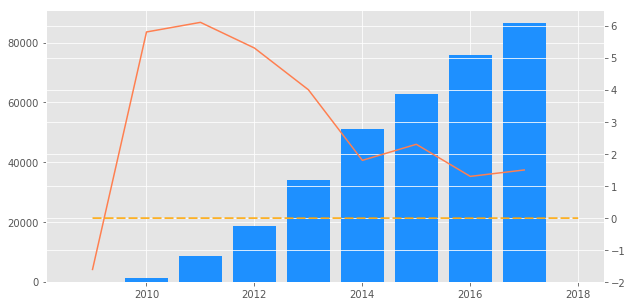

In [50]:
fig, ax1= plt.subplots(figsize=(10,5))

ax1.bar(re_anho['Año'],re_anho['ID_CLIENTE'],color='dodgerblue')

ax2 = ax1.twinx()

ax2.plot(data['Año'],data['PIB'],color='coral')

ax2.plot(data['Año'],np.zeros(data.shape[0]),dashes=[6,2],color='orange')

plt.show()

En el siguiente gráfico se muestra la cantidad de recambios por años asociados al vehículo, en un año especifico, a contar del 2009. Se puede visualizar que el recambio de los autos con respecto a sus años no otorga una distinción significativa con respecto a los datos.

In [51]:
recambio_año = data[data['Año']!=2018].groupby(['AÑO','Año'],as_index=False).agg({'PATENTE':'count'}).rename(columns={'PATENTE':'cantidad_recambio'})
recambio_año = recambio_año.astype('int')

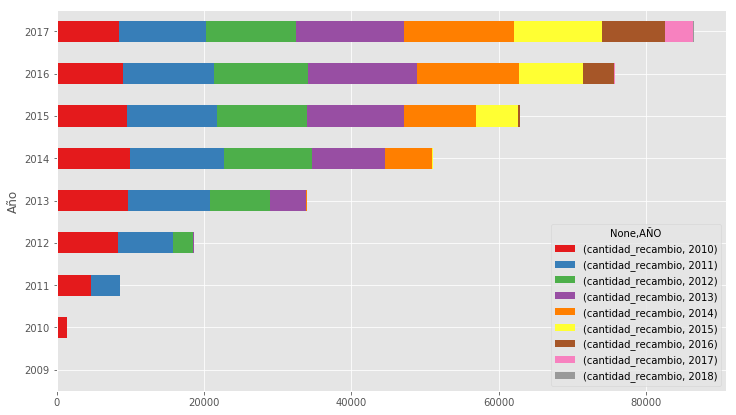

In [52]:
fig ,ax= plt.subplots(figsize=(12,7))
ax = recambio_año.groupby(['AÑO','Año']).agg({'cantidad_recambio':sum}).unstack(level=0).plot(kind='barh',cmap='Set1',stacked=True,ax=ax)

**VIII.- Análisis tenencia de vehículos por cliente en el histórico**  

En el siguiente gráfico se puede concluir que existen empresas asociadas a Derco, y lo que destaca este grafico es el comportamiento creciente de estos clientes con respecto a la empresa, este apartado aborda el tema de la clasificación de clientes.  

Una idea de cómo abordar este problema es bajo un modelo de clustering como K-means, sin embargo existen otros métodos, por ejemplo clasificación general de clientes a partir de sus recambios, tasaciones, modelos, año y marcas de los vehículos, estructurando una segmentación sólida para cada cliente.

In [53]:
recambio = data.groupby('ID_CLIENTE',as_index=False).agg({'PATENTE':'count'}).rename(columns={'PATENTE':'cantidad_recambio'})
data = pd.merge(data, recambio, on='ID_CLIENTE', how='left')

In [54]:
clientes_pref = data[data['Año'] != 2018].groupby('ID_CLIENTE',as_index=False).agg({'PATENTE':'count'}).rename(columns={'PATENTE':'cantidad_recambio'}).sort_values('cantidad_recambio',ascending=False)[:10]
clientes_pref = data[data.ID_CLIENTE.isin(clientes_pref.ID_CLIENTE) & (data['Año'] != 2018)]
clientes_pref = clientes_pref.sort_values('cantidad_recambio')
clientes_pref['ID_CLIENTE'] = clientes_pref.ID_CLIENTE.factorize()[0] + 1

clientes_pref['ID_CLIENTE'] = 'Clientes ' + clientes_pref['ID_CLIENTE'].astype(str)

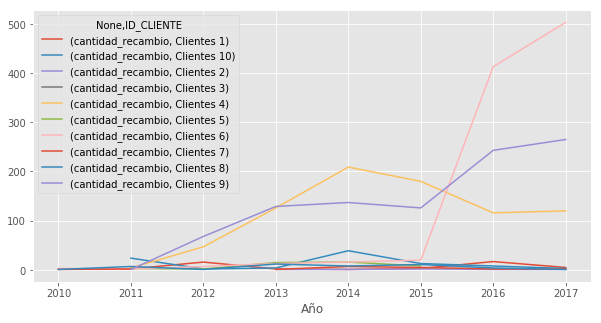

In [55]:
fig, ax= plt.subplots(figsize=(10,5))

clientes_pref.groupby(['Año','ID_CLIENTE']).agg({'PATENTE':'count'}).rename(columns={'PATENTE':'cantidad_recambio'}).unstack(level=1).plot(ax=ax)


## 4.- Propuestas y cierre

Como trabajo a futuro, se plantea construir un modelo de clustering o segmentación se clientes utilizando el algoritmo no supervisado K-means. De esta manera se tendrán perfilado los clientes con diferentes gustos, preferencias, frecuencia, recencia y monto de tasación, además de otros criterios que deben discutirse para la estructuración del modelo, este problema se aborda no tan solo con herramientas analíticas y matemáticas, hay que tener conocimiento con respecto al sector automotriz y BI orientado al cliente.  

Para finalizar, se dejan planteada las conclusiones a partir del análisis de datos anteriormente desarrollado. A partir del análisis se extraen las ideas más importantes, que influyen en las preferencias y tendencias de los clientes con respecto a la tenencia de vehículos.

1-. Se analizaron los recambios por comunas a lo largo del país. Obteniendo como resultado que en la comuna de Las Condes es donde se hacen más recambios.  

2-. El 80% de los datos de transacciones de toda la data se centran en 13 comunas de todo el país.  

3-. El 80% de los compradores prefieren autos de colores claros.  

4-. Las marcas más vendidas son: HYUNDAI y NISSAN, ya que poseen también más móldelos disponibles.  

5-. El modelo más vendido es RAV4 de TOYOTA (en sus diferentes variantes del modelo), seguido de NISSAN QASHQAI y de HYUNDAI SANTA FE.   

6-. El promedio mínimo de edad es de 44 años y estas personas prefieren el modelo GRAN VITARA de SUZUKI, en contraste del promedio de mayor edad (que es de 56 años) que prefieren el modelo CR V de HONDA.  

7-. Las tasaciones (ajustadas) entre los diferentes modelos tiene dos picks importantes, siendo la HUNTER de ZOYTE la más económica con un promedio de 4.000.000 de pesos aprox, seguidas de la CHEROKKE de JEEP y la PILOT de HONDA las más caras con un promedio sobre los 14.000.000 de pesos aprox (todo en base a las preferencias de transacciones).